# 標本の統計量の性質

- シミュレーションによって（本来は一度しかできない）サンプリングを複数回実行し
- 標本の特徴を調べていく

## 【用語】標本分布

標本分布とは、標本の統計量が従う確率分布

ただし、勘違いしやすいので要注意

- 標本抽出（試行）シミュレーションを1000回やるとする
- 標本抽出（試行）のサンプルサイズは10とする
- 標本平均が1000個算出できる
- <font color=red>「1000個の標本平均の従う確率分布」が標本分布である</font>


In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%precision 3
%matplotlib inline

/root/local/bin/python-3.7.3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/root/local/bin/python-3.7.3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/root/local/bin/python-3.7.3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/root/local/bin/python-3.7.3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/root/local/bin/python-3.7.3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: nump

In [4]:
# 本章では母集団は常に「平均4、標準偏差0.8（分散0.64）の正規分布」に従うとする
population = stats.norm(loc=4, scale=0.8)
population

In [45]:
# 10000回試行（標本抽出）して、標本平均を10000回算出する
np.random.seed(1)
num_of_sampling = 10000
sample_mean_arr = np.zeros(num_of_sampling)
for i in range(num_of_sampling):
    # sample size = 10
    sample = population.rvs(size=10)
    sample_mean_arr[i] = np.mean(sample)
sample_mean_arr

array([3.922, 3.864, 4.07 , ..., 4.136, 4.575, 4.099])

In [47]:
# 標本平均の（複数標本抽出における）平均値は、母平均に近い
# 「10000個の標本平均」の標本平均を求める
mean_of_sample_mean_arr = np.mean(sample_mean_arr)
print('mean of sample mean array : ', mean_of_sample_mean_arr)
# 「10000個の標本平均」の標準偏差を求める
std_of_sample_mean_arr = np.std(sample_mean_arr, ddof=1)
print('std of sample mean array : ', std_of_sample_mean_arr)
print('母標準偏差0.8よりも小さい')

mean of sample mean array :  4.004202422791747
std of sample mean array :  0.2513580850860402
母標準偏差0.8よりも小さい


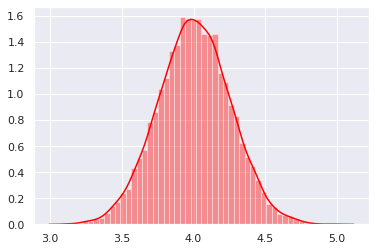

In [49]:
# 10000個の標本平均のヒストグラムを描く
# これが「平均値の標本分布」である
sns.distplot(sample_mean_arr, color='red')

Text(0, 0.5, 'sample mean')

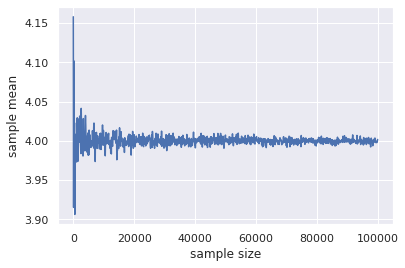

In [50]:
# サンプルサイズが大きければ標本平均は母平均に近い
# 【シミュレーション】
# > 対象：標本平均
# > パラメータ：サンプルサイズ
# > 調べたいこと：サンプルサイズが大きくなると、標本平均は母平均に近づくか？
sample_size_arr = np.arange(start=10, stop=100100, step=100)
sample_mean_arr = np.zeros(len(sample_size_arr))
for i in range(0, len(sample_size_arr)):
    sample = population.rvs(size=sample_size_arr[i])
    sample_mean_arr[i] = np.mean(sample)
# plot
plt.plot(sample_size_arr, sample_mean_arr, color='b')
plt.xlabel('sample size')
plt.ylabel('sample mean')

In [51]:
# sample size と 試行回数(n_trial) を引数にとり
# 指定したサンプルサイズにおける試行回数分の標本平均の配列を返す関数
def calc_sample_mean(size, n_trial):
    sample_mean_arr = np.zeros(n_trial)
    for i in range(len(sample_mean_arr)):
        sample = population.rvs(size=size)
        sample_mean_arr[i] = np.mean(sample)
    return sample_mean_arr

In [54]:
# サンプルサイズを変えた時の標本平均をバイオリンプロットでより直感的に分かりやすく
sample_size_pattern = [10, 20, 30]
n_trial = 10000
df_arr = []
for ssize in sample_size_pattern:
    sample_mean_arr = calc_sample_mean(ssize, n_trial)
    df = pd.DataFrame({
        'sample_mean': sample_mean_arr,
        'sample_size': ['size {0}'.format(ssize)] * len(sample_mean_arr)
    })
    df_arr.append(df)
df_arr

[      sample_mean sample_size
 0        3.859932     size 10
 1        4.248071     size 10
 2        3.722892     size 10
 3        4.164258     size 10
 4        3.858324     size 10
 ...           ...         ...
 9995     3.887206     size 10
 9996     3.775925     size 10
 9997     4.469620     size 10
 9998     3.817683     size 10
 9999     3.822354     size 10
 
 [10000 rows x 2 columns],
       sample_mean sample_size
 0        3.884313     size 20
 1        3.827657     size 20
 2        4.085333     size 20
 3        4.408167     size 20
 4        4.280421     size 20
 ...           ...         ...
 9995     4.157937     size 20
 9996     3.945957     size 20
 9997     4.141425     size 20
 9998     3.589438     size 20
 9999     3.540851     size 20
 
 [10000 rows x 2 columns],
       sample_mean sample_size
 0        4.159503     size 30
 1        3.805001     size 30
 2        4.053342     size 30
 3        4.091336     size 30
 4        4.051172     size 30
 ...        

ここで言いたいのは、分散が小さくなっていることではなく、平均が母平均4に近づいていること


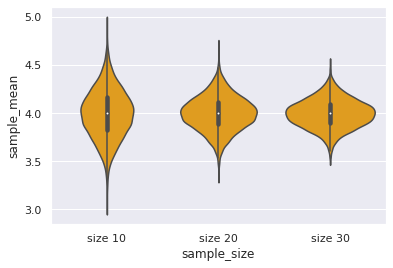

In [57]:
# 結合して、プロット
results = pd.concat(df_arr)
sns.violinplot(x='sample_size', y='sample_mean', data=results, color='orange')
print('ここで言いたいのは、分散が小さくなっていることではなく、平均が母平均4に近づいていること')

Text(0, 0.5, 'sample_mean_std value')

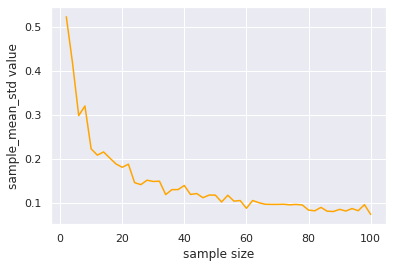

In [59]:
# （複数試行して得られた複数）標本平均の（標本）標準偏差は、母標準偏差より小さい
# 【シミュレーション】
# > 対象：標本平均の標準偏差
# > パラメータ：サンプルサイズ
# > 調べたいこと：サンプルサイズが大きくなると、標本平均の標準偏差は小さくなっていくか？
# 試行回数は100回で固定
# 横軸にサンプルサイズ、縦軸に(100試行した時の)標本平均の標準偏差をプロット
sample_size_pattern = np.arange(start=2, stop=102, step=2)
n_trial = 100
sample_mean_std_arr = np.zeros(len(sample_size_pattern))
for i, ssize in enumerate(sample_size_pattern):
    sample_mean_arr = calc_sample_mean(ssize, n_trial)
    sample_mean_std_arr[i] = np.std(sample_mean_arr, ddof=1)
# plot
plt.plot(sample_size_pattern, sample_mean_std_arr, color='orange')
plt.xlabel('sample size')
plt.ylabel('sample_mean_std value')

### 標準誤差という概念の導入

$$
standard err = \frac{\sigma}{\sqrt(N)}
$$

先ほど求めた「複数回試行における標本平均の標準偏差」と今導入した「標準誤差」は
サンプルサイズが大きくなるにつれて、小さくなるという性質及び、その値が類似していることを確認する

Text(0, 0.5, 'sample_mean_std value')

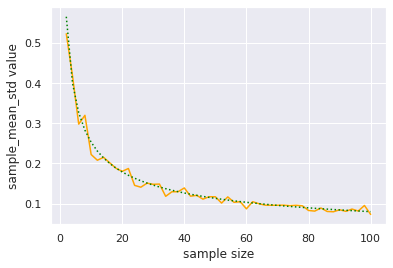

In [60]:
standard_err_arr = 0.8 / np.sqrt(sample_size_pattern)
plt.plot(sample_size_pattern, sample_mean_std_arr, color='orange')
plt.plot(sample_size_pattern, standard_err_arr, color='green', linestyle='dotted')
plt.xlabel('sample size')
plt.ylabel('sample_mean_std value')

In [63]:
# 標本分散の平均値は、母分散からずれている.
# 不偏分散の平均値は、母分散に近い.
# > サンプルサイズ10の標本抽出を10000回行うシミュレーションを実施、
# > 各標本抽出における標本分散/不偏分散を算出し、全試行における平均値を算出、
# > その値が母平均からずれている/近いことを確認する
n_trial = 10000
sample_var_arr = np.zeros(n_trial)
sample_unbias_var_arr = np.zeros(n_trial)
for i in range(n_trial):
    sample = population.rvs(size=10)
    sample_var_arr[i] = np.var(sample, ddof=0)
    sample_unbias_var_arr[i] = np.var(sample, ddof=1)
# 母分散0.64に比べて少しずれている
print('母分散0.64に対して')
print('標本分散の平均値は、', np.mean(sample_var_arr))
print('不偏分散の平均値は、', np.mean(sample_unbias_var_arr))

母分散0.64に対して
標本分散の平均値は、 0.5766844068830039
不偏分散の平均値は、 0.6407604520922265


Text(0, 0.5, 'unbias var')

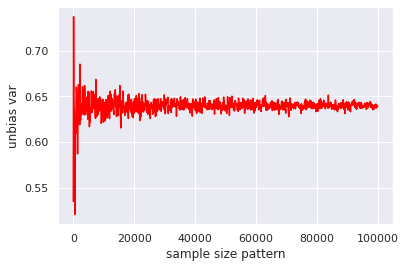

In [74]:
# サンプルサイズが大きければ、(一回の試行の)不偏分散は母分散に近い
sample_size_arr = np.arange(start=10, stop=100100, step=100).tolist()
sample_unbias_var_arr = np.zeros(len(sample_size_arr))
for i, ssize in enumerate(sample_size_arr):
    sample = population.rvs(size=ssize)
    sample_unbias_var_arr[i] = np.var(sample, ddof=1)
# 横軸サンプルサイズ、縦軸不偏分散
plt.plot(sample_size_arr, sample_unbias_var_arr, color='red')
plt.xlabel('sample size pattern')
plt.ylabel('unbias var')

### 【用語】不偏性

- 推定量の期待値が真の母数（母集団のパラメタ）となる特性を不偏性という
- 「不偏性がある」＝「平均すると過大にも過小にもなっていない」

### 【用語】一致性

- サンプルサイズが大きくなると推定量が真の母数に近づく特性
- 「一致性がある」＝「サンプルサイズが無限であれば、推定量と母数が一致する」

### 母数に対する '良い' 推定量とは

- 本来の目的は、「母集団分布を知ること」（そうすれば未知のデータに対して予測・推測可能）
- 母集団分布を知る為には、「分布モデルを仮定し、モデルの母数を推定する」必要がある
- ここでは、母集団分布モデルは正規分布を仮定している。正規分布の母数は「平均と分散」である
- シミュレーションで確認したことは
  - (1) 「標本平均の平均値は母平均とほぼ同じ」「不偏分散の平均値は母分散とほぼ同じ」
  - (2) 「サンプルサイズを大きくすると、標本平均は母平均に近づき、不偏分散は母分散に近づく」

### 【重要法則・定理】大数の法則と中心極限定理

個人的に、好きな定理。名前がかっこいいから。

#### 大数の法則

標本の大きさが大きくなるにつれて、標本平均が母平均に近づく近づき方を表現した法則

#### 中心極限定理

母集団分布が何であっても、サンプルサイズが大きいときには、確率変数の和は正規分布に近いものになる。


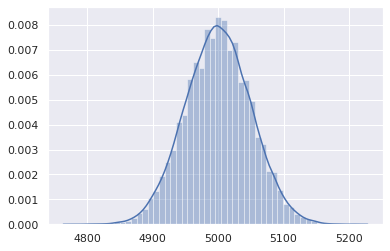

In [75]:
# 中心極限定理の例
# > コインを1回投げた時に表になる確率：P(head) = 1/2
# > コイン10000回投げた時の表になった回数の（複数回試行したときの）分布 = ほぼ正規分布
n_size = 10000 # コイン10000回なげる＝1試行
n_trial = 50000
coin = np.array([0, 1])
head_count = np.zeros(n_trial)
# コインをn_size回投げる試行をn_trial回行うシミュレーション
for i in range(n_trial):
    head_count[i] = np.sum(np.random.choice(coin, size=n_size, replace=True))
sns.distplot(head_count)

#### 中心極限定理解説

- 「10000回のコイン投げ結果を合計する」という処理が、中心極限定理における「確率変数の和」を意味する
- で、この合計値の分布が正規分布に近いというのが中心極限定理である
- 話は変わって、標本平均を求める時、合計値を求める計算が入るので、標本平均の挙動は合計値の挙動に近いと考えることができる。
- したがって、「標本平均の分布は正規分布に近い分布になる」というのが、中心極限定理の原義を少し応用した考え方である

<font color=red>**※注意点**</font>

- 標本の **合計値** が正規分布に従うだけであるということ
- コインの例で言えば サンプルサイズ1の標本抽出は、二項分布に従う。それ自体は変わらない。